# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model,load_model
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Data Science Portfolio/Targeted Aid Marketing Campaign/

/content/drive/MyDrive/Data Science Portfolio/Targeted Aid Marketing Campaign


# EDA

In [4]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
# MSRP is the manufacturer's suggested retail price.
# MSRP is used to standardize the price of products over multiple company store locations.

In [5]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
# convert 'ORDERDATE' type to datetime
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [8]:
# check null values
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
# drop null values & unnecessary columns
sales_df = sales_df.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'], axis = 1)

In [10]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [11]:
# number of unique values in each column
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [12]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object', name='COUNTRY')

In [13]:
# create function visualize categorical variable frequencies using a bar plot
def barplot_visualization(x):
  fig = plt.figure(figsize = (10,10))
  fig = px.bar(x = sales_df[x].value_counts().index, y =  sales_df[x].value_counts(), color =sales_df[x].value_counts().index )
  fig.show()

In [14]:
# visualize distribution of samples per country
barplot_visualization('COUNTRY')

<Figure size 1000x1000 with 0 Axes>

In [15]:
# visualize the distribution of data points for each unique category in the "status" column to observe any imbalance
barplot_visualization('STATUS')

<Figure size 1000x1000 with 0 Axes>

In [16]:
# drop 'STATUS' column because the difference is really high
sales_df.drop(columns= ['STATUS'], inplace = True)

In [17]:
# visualize the distribution of "PRODUCTLINE" column
barplot_visualization('PRODUCTLINE')

<Figure size 1000x1000 with 0 Axes>

In [18]:
# visualize the distribution of "DEALSIZE" column to observe kinda unbalanced data
barplot_visualization('DEALSIZE')

<Figure size 1000x1000 with 0 Axes>

In [19]:
# create function to convert categorical to dummy variables
def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x, inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [20]:
# convert 'COUNTRY' feature to dummy variables
sales_df = dummies('COUNTRY')

In [21]:
# # convert 'PRODUCTLINE' feature to dummy variables
sales_df = dummies('PRODUCTLINE')

In [22]:
# dummies are chosen over label encoding to highlight specific outcomes and demonstrate effective handling methods
sales_df = dummies('DEALSIZE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True


In [23]:
# encoding 'PRODUCTCODE' to integer codes
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   QTR_ID            2823 non-null   int64         
 6   MONTH_ID          2823 non-null   int64         
 7   YEAR_ID           2823 non-null   int64         
 8   MSRP              2823 non-null   int64         
 9   PRODUCTCODE       2823 non-null   int8          
 10  Australia         2823 non-null   bool          
 11  Austria           2823 non-null   bool          
 12  Belgium           2823 non-null   bool          
 13  Canada            2823 non-null   bool          
 14  Denmark           2823 n

In [25]:
# grouping sales by order date
sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,0,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,0,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,0,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,13,...,7,0,0,0,0,0,8,0,8,7


When does sales generally peak?

In [26]:
# sales peak in 14 Nov 2023 & 24 Nov 2024
px.line(x = sales_df_group.index, y = sales_df_group['SALES'])

In [27]:
# drop 'ORDERDATE' and work with 'YEAR' & 'MONTH'
sales_df.drop("ORDERDATE", axis = 1, inplace = True)

<Axes: >

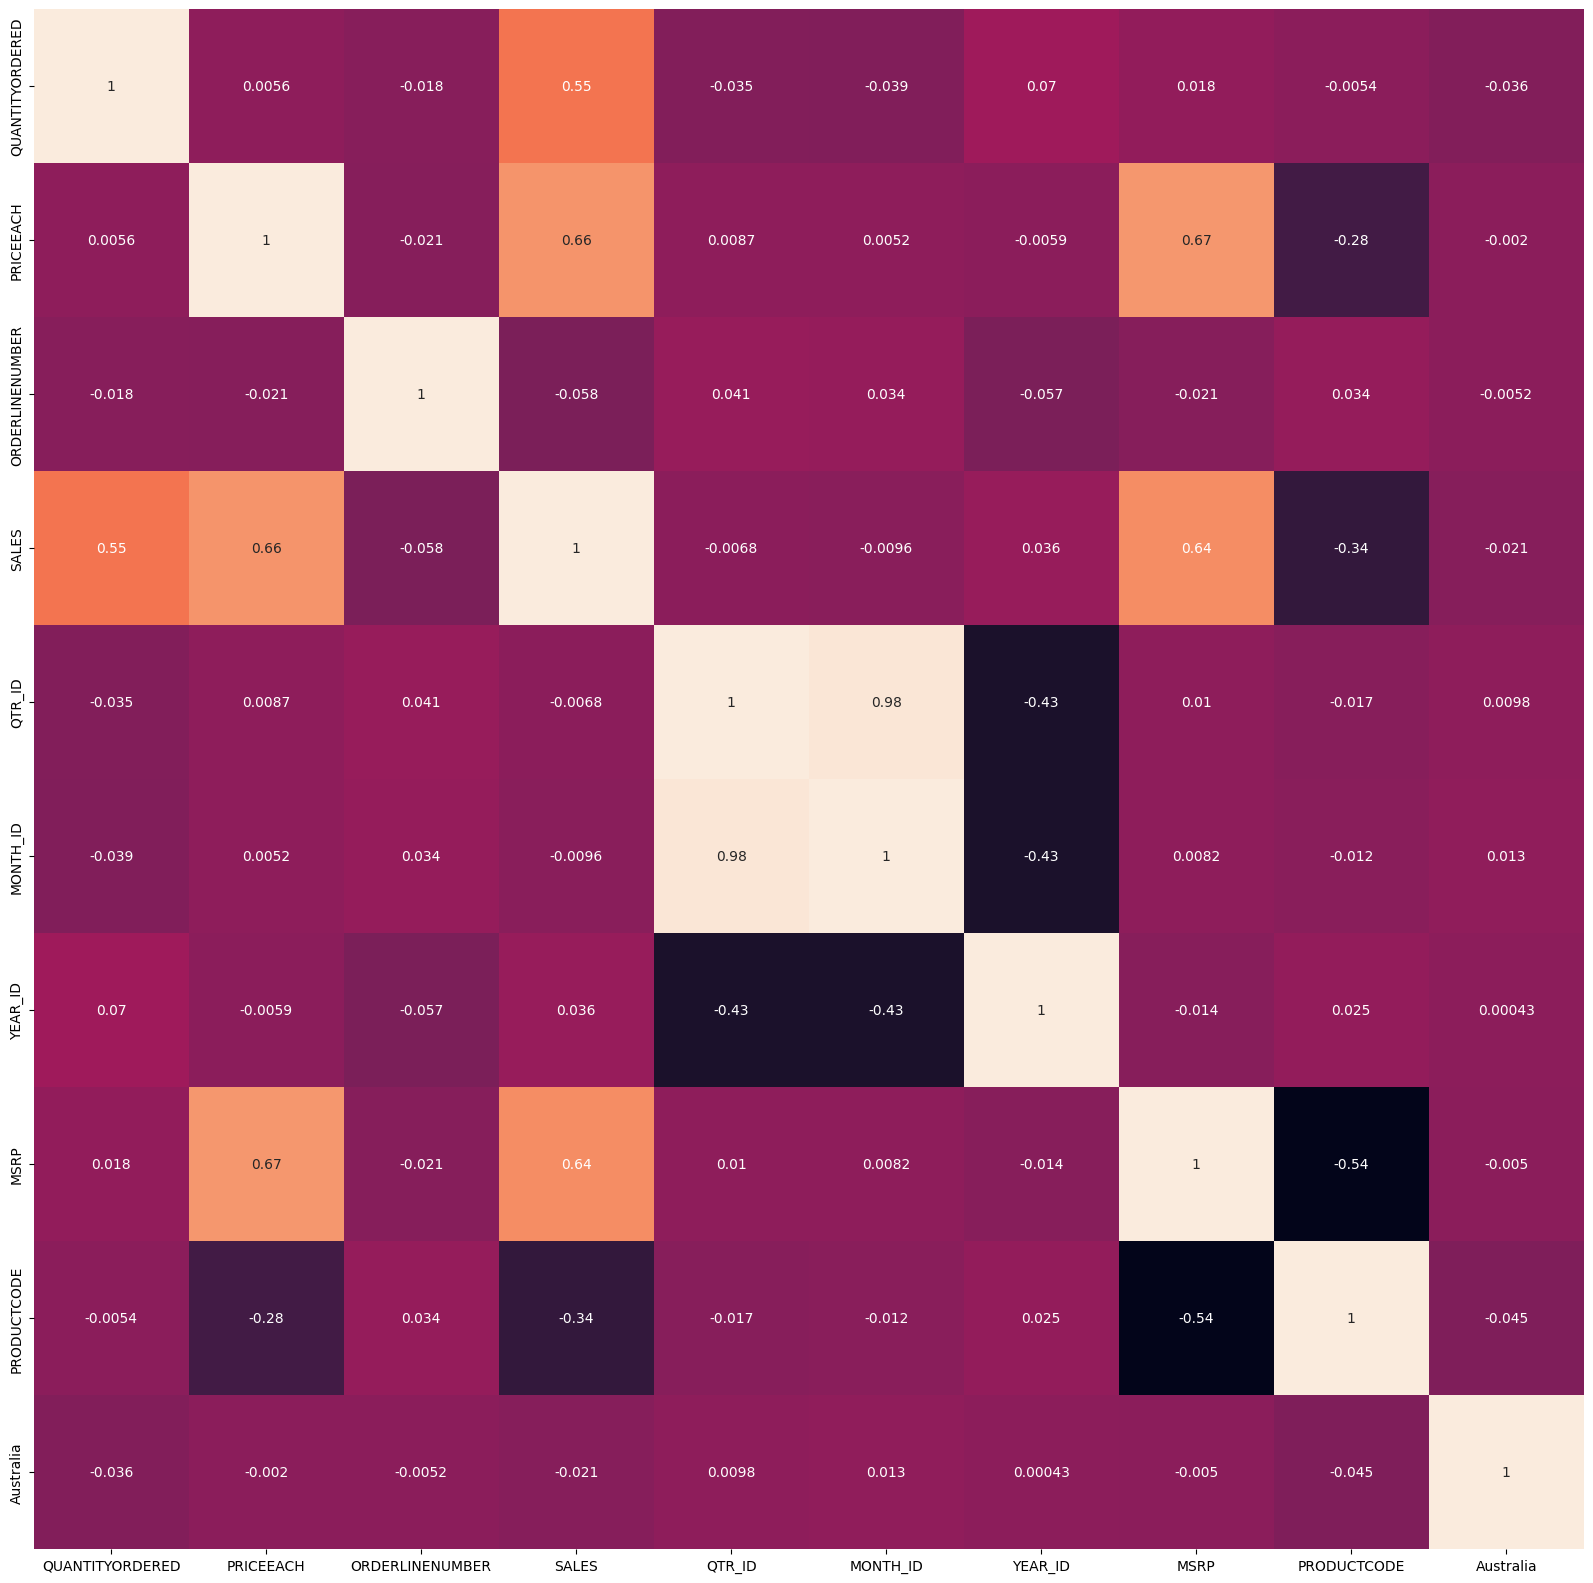

In [28]:
plt.figure(figsize = (20,20))
corr_matrix = sales_df.iloc[:,:10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)
# positive correlation between: msrp & sales, priceeach

In [29]:
# drop Quarter ID as its highly correlated with monthly IDs
sales_df.drop("QTR_ID", axis = 1, inplace = True)

In [30]:
# plot histogram with kde
for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text =  sales_df.columns[i])
    fig.show()

In [31]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   MONTH_ID          2823 non-null   int64  
 5   YEAR_ID           2823 non-null   int64  
 6   MSRP              2823 non-null   int64  
 7   PRODUCTCODE       2823 non-null   int8   
 8   Australia         2823 non-null   bool   
 9   Austria           2823 non-null   bool   
 10  Belgium           2823 non-null   bool   
 11  Canada            2823 non-null   bool   
 12  Denmark           2823 non-null   bool   
 13  Finland           2823 non-null   bool   
 14  France            2823 non-null   bool   
 15  Germany           2823 non-null   bool   
 16  Ireland           2823 non-null   bool   


In [32]:
sales_df.columns[:8]

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'PRODUCTCODE'],
      dtype='object')

In [33]:
fig = px.scatter_matrix(sales_df, dimensions = sales_df.columns[:9], color = 'MONTH_ID' )
fig.update_layout(
    title = 'Sales Data',
    width = 1300,
    height = 1300,
)
fig.show()
# trend  between 'SALES' and 'QUANTITYORDERED'
# trend  between 'MSRP' and 'PRICEEACH'
# trend  between 'PRICEEACH' and 'SALES'
# It seems that sales growth exists as we move from 2003 to 2004 to 2005

In [34]:
# scaling the data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [35]:
sales_df_scaled.shape

(2823, 37)

# Kmeans Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

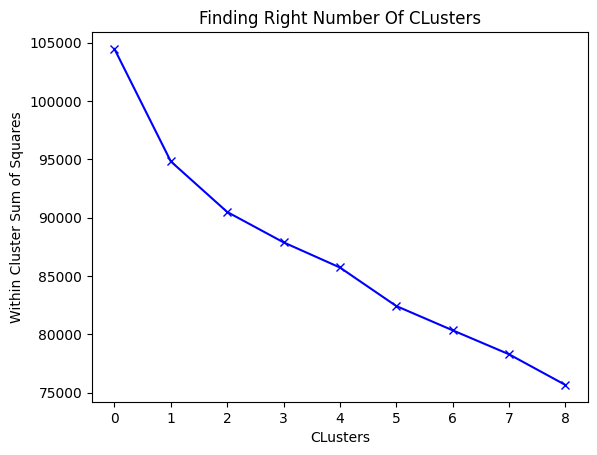

In [36]:
# finding the right number of clusters using elbow method for kmeans
scores = []
for i in range (1,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  # append inertia(sum of squared distances of samples to their closest cluster center)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding Right Number Of CLusters')
plt.xlabel('CLusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()
# 5th cluster seems to be forming the elbow of the curve

In [37]:
# applying kmeans with k = 5
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
# clusters
np.asarray(labels)

array([4, 4, 1, ..., 1, 4, 1], dtype=int32)

In [39]:
kmeans.cluster_centers_.shape

(5, 37)

In [40]:
# combine cluster centers with sales_df columns
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])

In [41]:
# applying inverse scale to get meaningful values
cluster_centers = scaler.inverse_transform(cluster_centers)

In [42]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers
# Cluster 0 - This group represents customers who buy items in low quantity ~35, they tend to buy average price items ~75, their sales ~2938 . They buy products with MSRP ~72.9.
# Cluster 1 - This group represents customers who buy items in quantity ~37, they tend to buy average price items ~96. Their sales is still low ~4439, they buy products with MSRP of ~118.
# Cluster 2(Highest)- This group represent customers who buy items in quantity ~47, they buy high price items around ~99 resulting in the  total sales around ~8289, they buy products with highest MSRP of ~158.
# Cluster 3 - This group represents customers who buy items in highest quantity ~34, they buy highest price items around ~80, their sales are the highest ~2923,they tend to buy items with MSRP around ~85.
# Cluster 4 (Lowest)- This group represents customers who buy items in lowest quantity ~30 with lowest average price items ~68, their sales ~2043 is the lowest among other clusters,they buy products with lowest MSRP ~77.

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,35.220779,75.654675,7.142857,2938.226883,7.129870,2003.792208,72.987013,73.766234,0.012987,1.387779e-17,...,-2.220446e-16,4.163336e-17,-8.326673e-17,-1.387779e-17,1.000000e+00,4.163336e-17,1.110223e-16,1.298701e-02,3.376623e-01,6.493506e-01
1,37.634383,95.927151,6.240517,4439.017111,7.101695,2003.799031,118.539144,45.282486,0.059726,2.259887e-02,...,4.277643e-01,1.259080e-01,8.071025e-03,8.635997e-02,1.387779e-16,1.412429e-01,2.106538e-01,6.800116e-16,1.000000e+00,-7.216450e-16
2,47.237179,99.798269,5.384615,8289.373141,6.794872,2003.903846,158.826923,25.814103,0.044872,2.564103e-02,...,6.217949e-01,1.217949e-01,5.769231e-02,-9.714451e-17,-5.204170e-17,4.487179e-02,1.538462e-01,1.000000e+00,-6.661338e-16,1.332268e-15
3,34.278746,80.599199,7.411150,2923.207178,6.801394,2003.912892,85.519164,81.965157,0.087108,1.742160e-02,...,1.110223e-16,-3.469447e-16,1.000000e+00,1.387779e-17,-1.006140e-16,0.000000e+00,4.996004e-16,-1.457168e-16,4.146341e-01,5.853659e-01
4,30.562970,68.410169,6.583647,2043.553111,7.201128,2003.796053,77.546053,58.708647,0.073308,1.691729e-02,...,3.195489e-01,1.466165e-01,6.106227e-16,1.193609e-01,1.283695e-16,1.118421e-01,3.026316e-01,5.620504e-16,-1.054712e-15,1.000000e+00


In [43]:
# concatenating cluster labels to sales dataframe to show which cluster correspond to which data point
sales_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster': labels})], axis =1)
sales_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,4
1,34,81.35,5,2765.90,5,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,4
2,41,94.74,2,3884.34,7,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,1
3,45,83.26,6,3746.70,8,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,1
4,49,100.00,14,5205.27,10,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,False,False,...,False,False,True,False,False,False,False,False,True,4
2819,29,100.00,1,3978.51,1,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,1
2820,43,100.00,4,5417.57,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,1
2821,34,62.24,1,2116.16,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,False,True,4


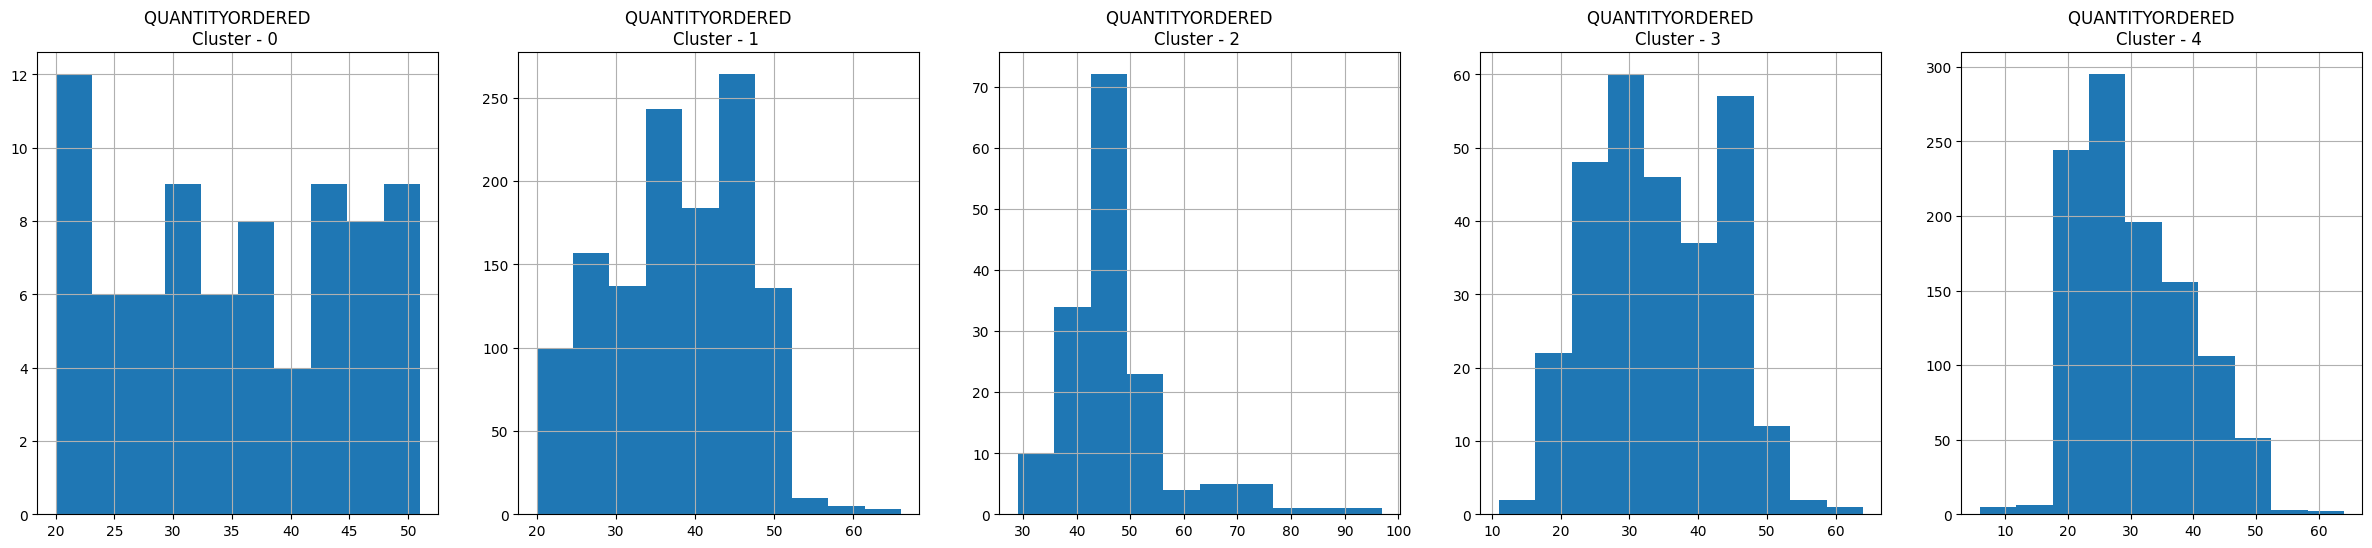

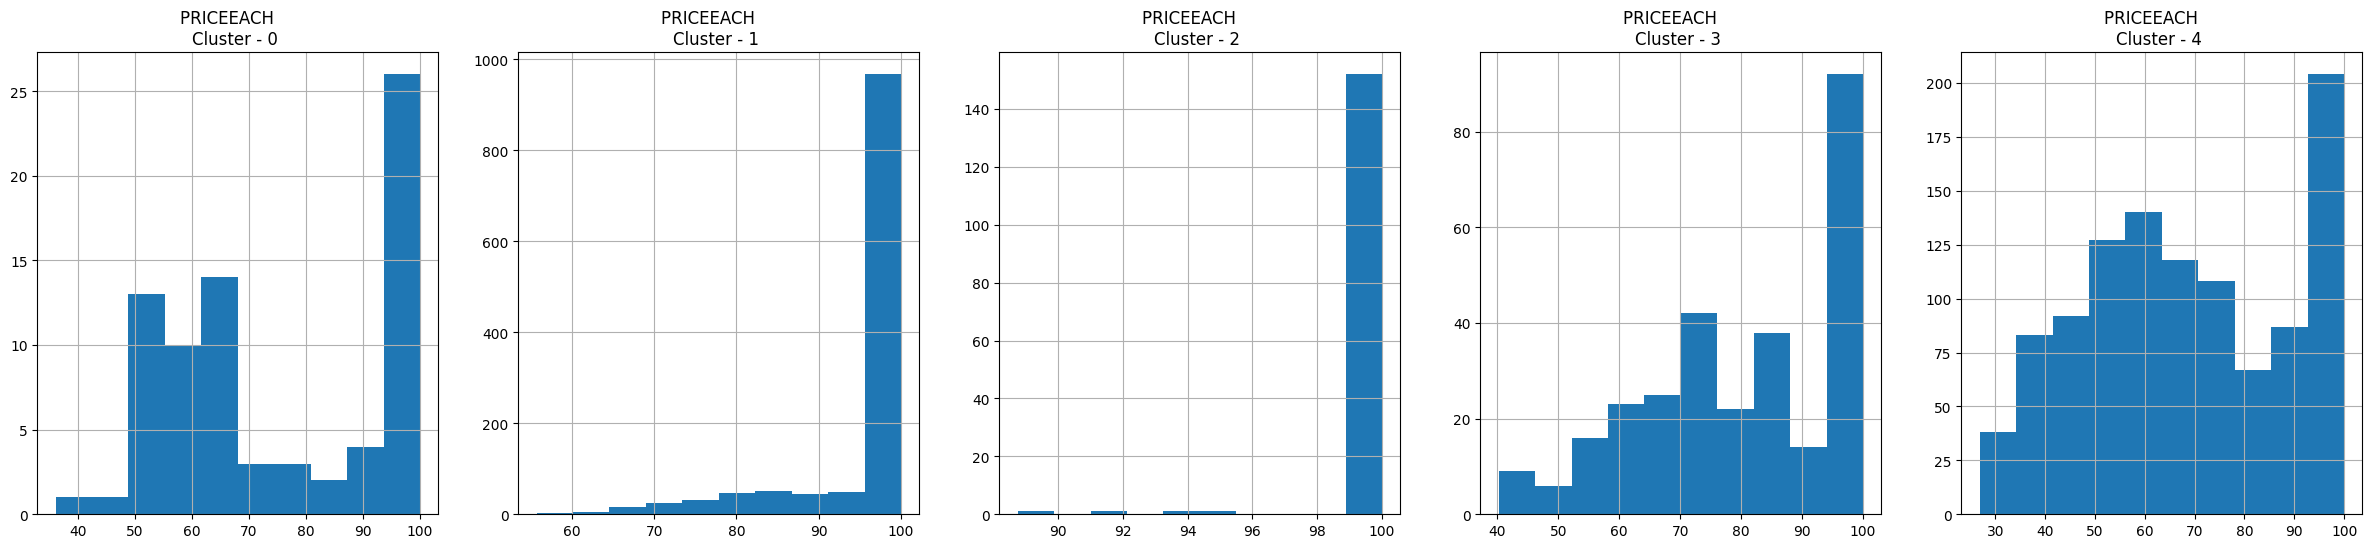

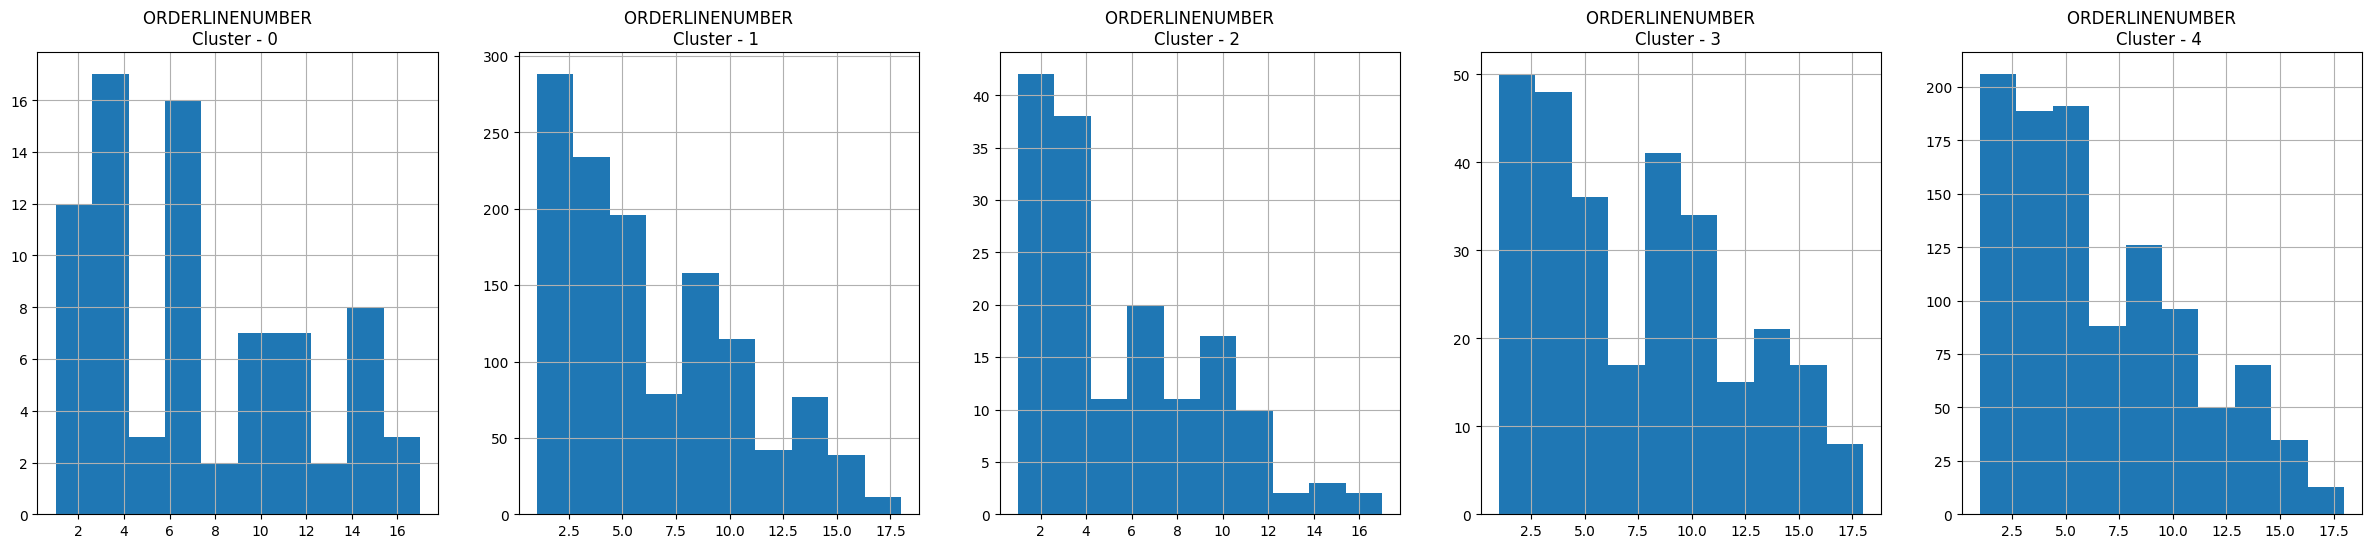

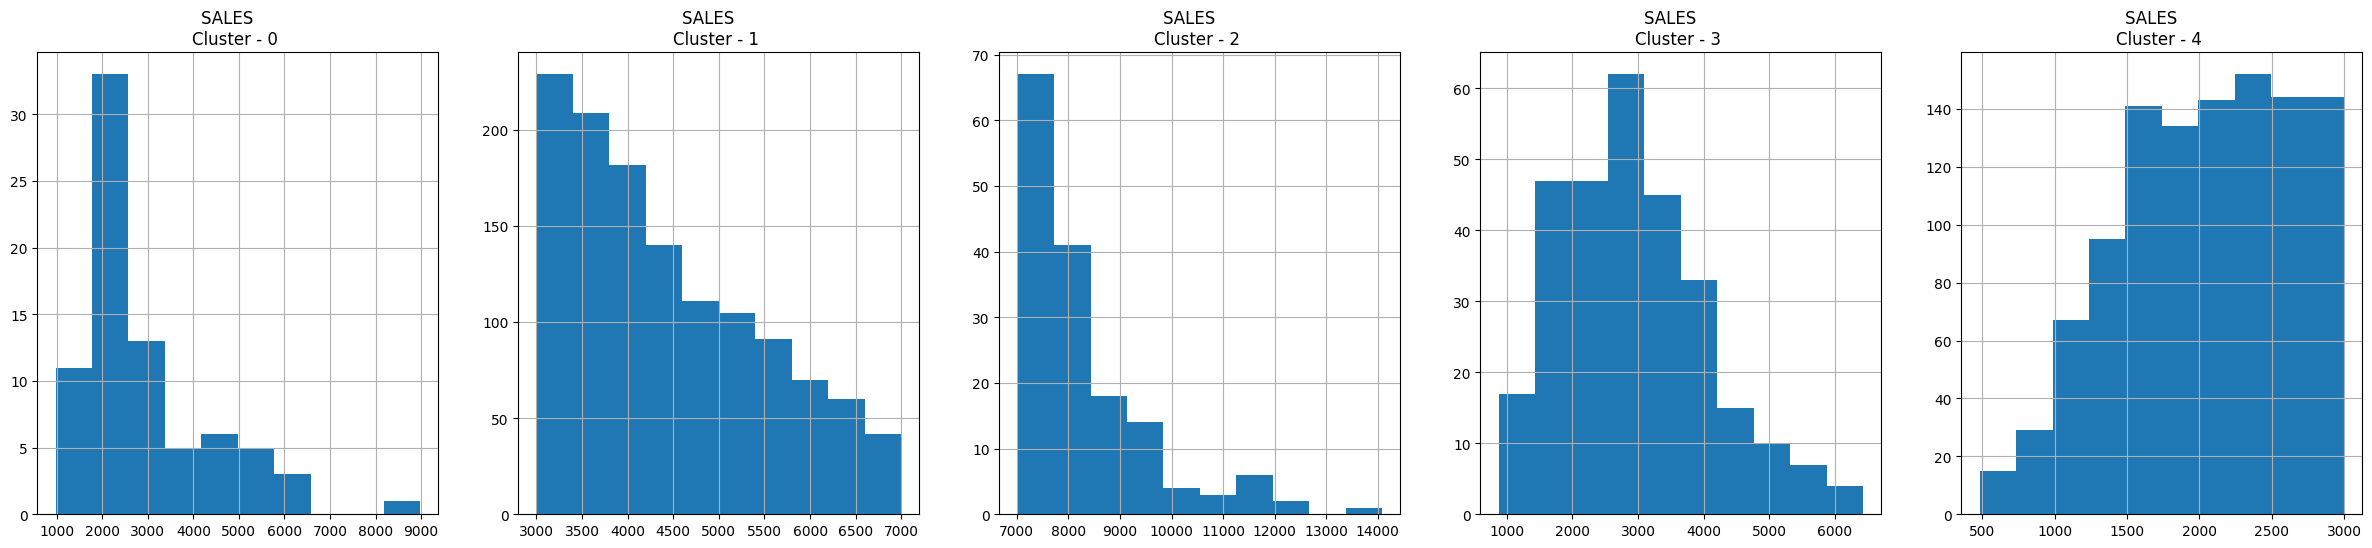

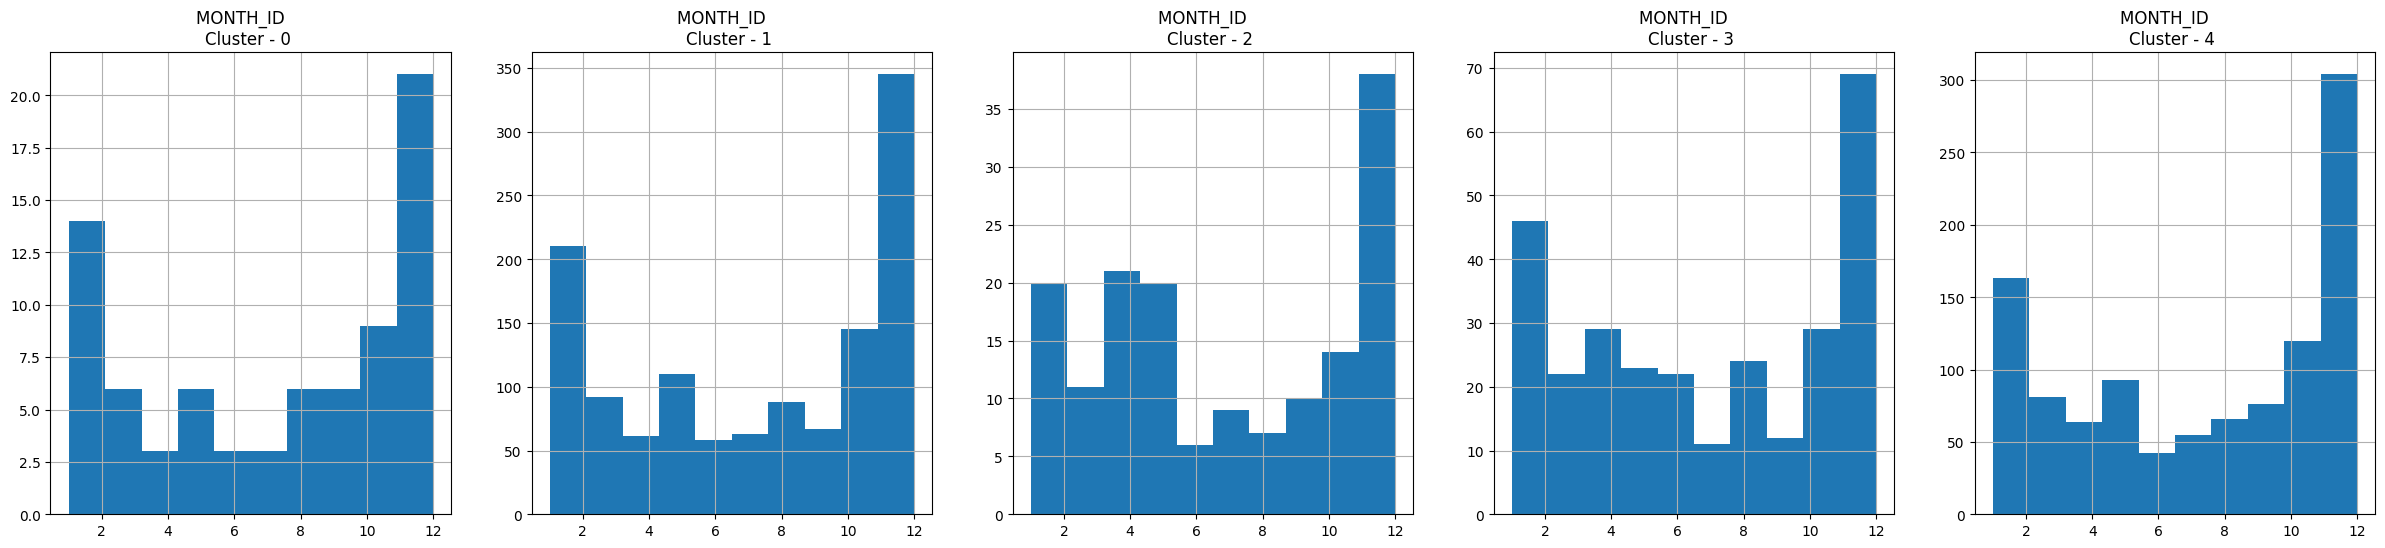

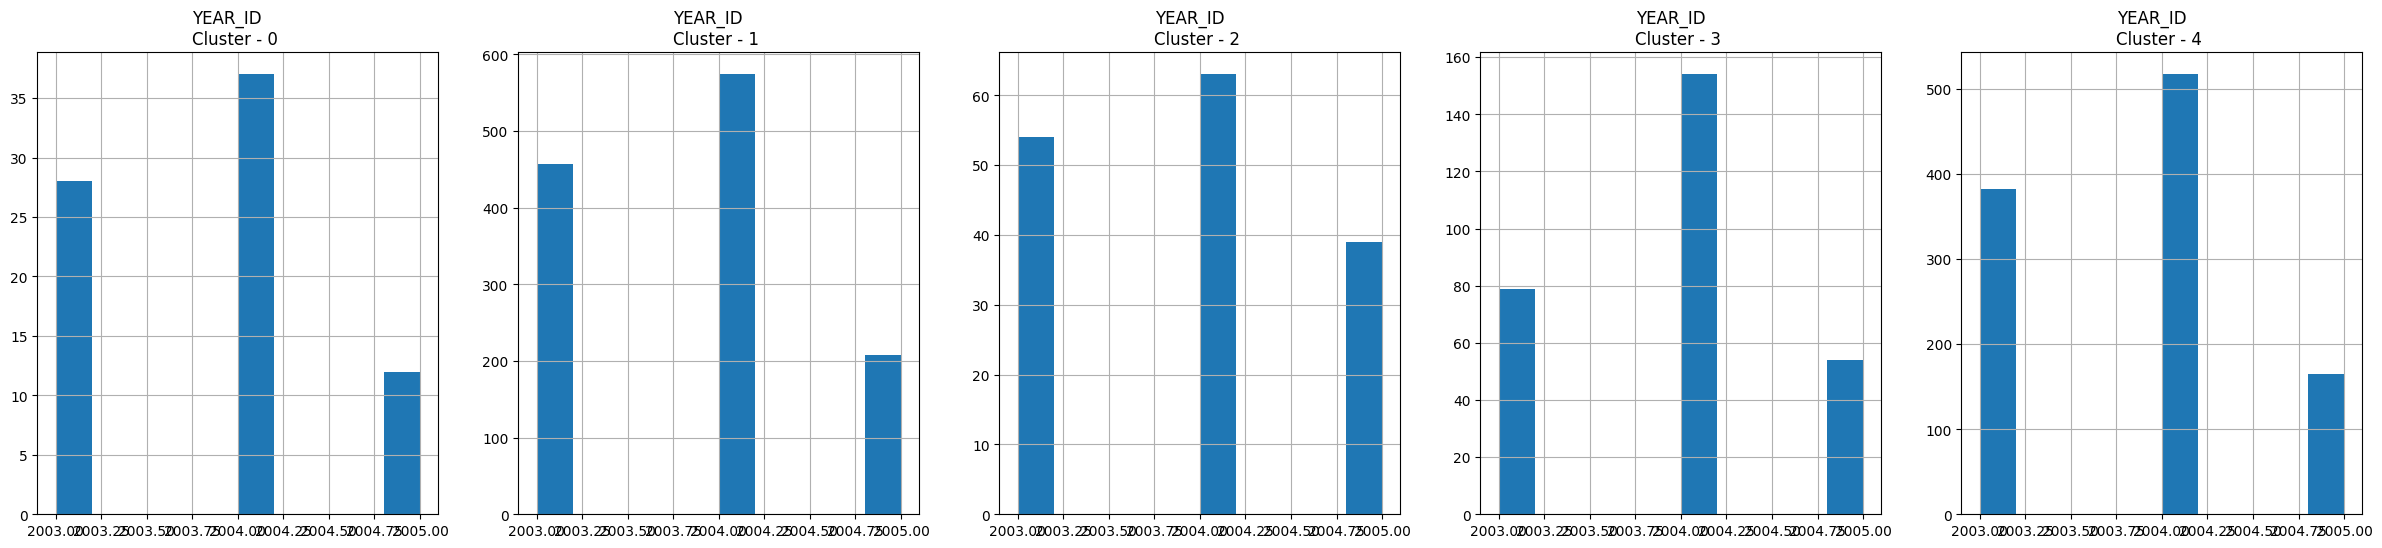

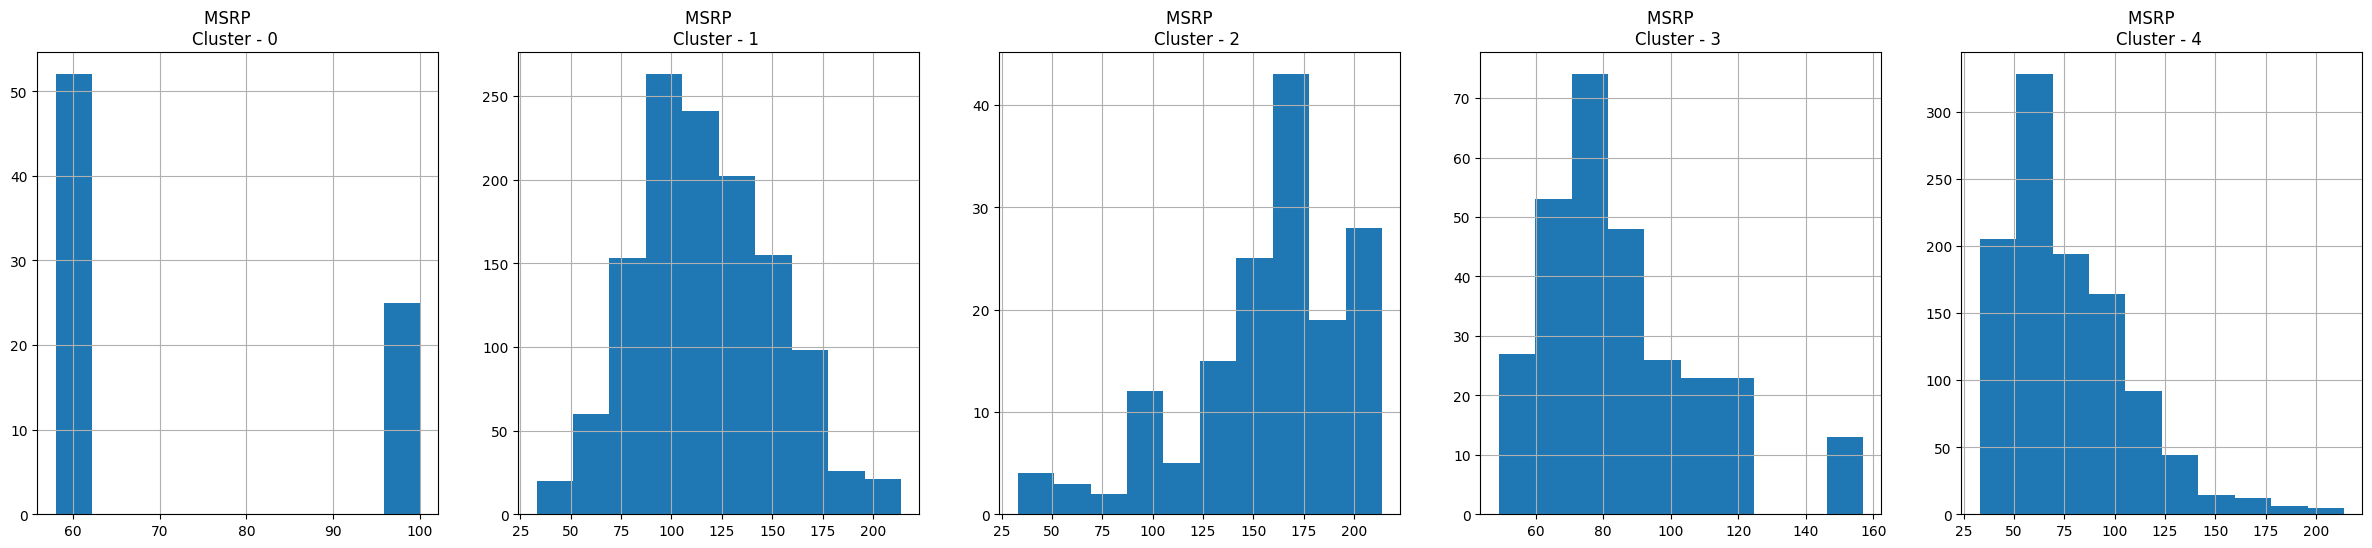

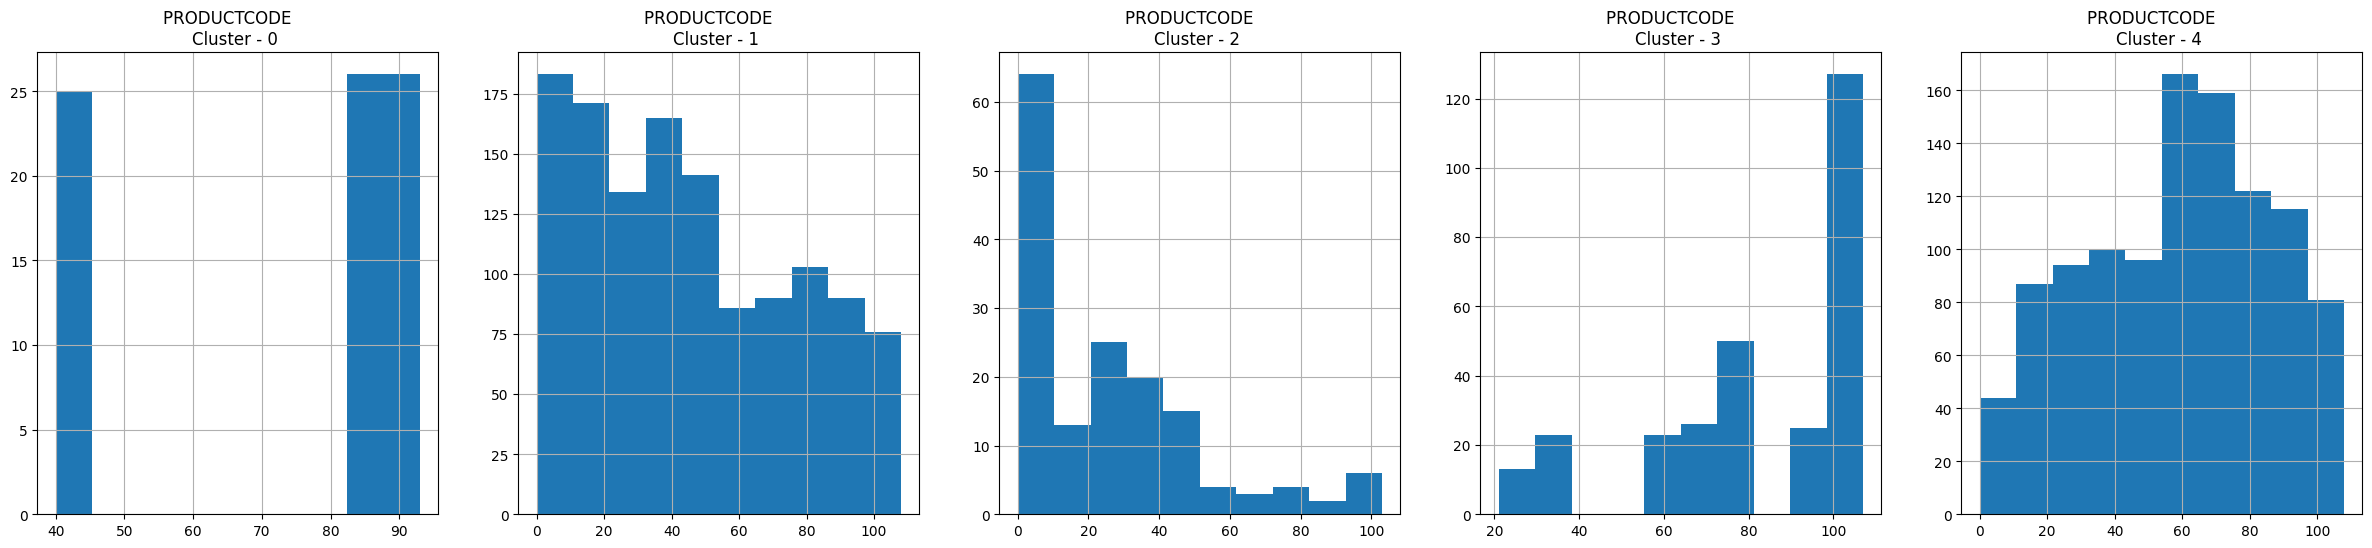

In [44]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sales_df_cluster[sales_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()

Dimension Reduction Using PCA

In [45]:
# reduce original dimensions to 3 dimensions for visualizing the clusters
pca= PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48632717, -1.17569085,  0.98483233],
       [-0.7847309 , -1.03021345,  1.3655265 ],
       [ 1.43138655,  0.11552999,  0.24034879],
       ...,
       [ 0.38984375,  4.0884992 , -0.06546376],
       [-2.78882662,  2.40366089,  1.54933377],
       [-0.70543637,  3.29283367, -0.47907501]])

In [46]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])

In [47]:
pca_df

,pca1,pca2,pca3
0,-0.486327,-1.175691,0.984832
1,-0.784731,-1.030213,1.365527
2,1.431387,0.115530,0.240349
3,1.288376,-0.240329,-0.580465
4,1.975946,-0.180575,-1.076971
...,...,...,...
2818,-2.450364,1.072242,-1.569925
2819,-0.158370,3.715224,0.578899
2820,0.389844,4.088499,-0.065464
2821,-2.788827,2.403661,1.549334


In [48]:
# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [49]:
pca_df

,pca1,pca2,pca3,cluster
0,-0.486327,-1.175691,0.984832,4
1,-0.784731,-1.030213,1.365527,4
2,1.431387,0.115530,0.240349,1
3,1.288376,-0.240329,-0.580465,1
4,1.975946,-0.180575,-1.076971,1
...,...,...,...,...
2818,-2.450364,1.072242,-1.569925,4
2819,-0.158370,3.715224,0.578899,1
2820,0.389844,4.088499,-0.065464,1
2821,-2.788827,2.403661,1.549334,4


In [50]:
# visualize clusters using 3D-scatterplot
fig = px.scatter_3d(data_frame = pca_df, x = 'pca1', y = 'pca2', z = 'pca3', color = 'cluster', size_max = 5, symbol='cluster', opacity = 0.7)
fig.show()

# Auto Encoder For Dimension Reduction

In [51]:
input_df = Input(shape=(37,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu')(x)
x = Dense(500, activation = 'relu')(x)
x = Dense(2000, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)
x = Dense(2000, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)
decoded = Dense(37)(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder for dimensionality reduction
encoder = Model(input_df, encoded)

In [52]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
autoencoder.fit(sales_df_scaled, sales_df_scaled, batch_size = 128, epochs = 500, verbose = 1)

Epoch 1/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0313
Epoch 2/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0296
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0328
Epoch 4/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0371
Epoch 5/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0499
Epoch 6/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 7/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0359
Epoch 8/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0345
Epoch 9/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0338
Epoch 10/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0306
Epoch 11/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0292
Epoch 12/500
23/23 [==============================] - 0s 7ms/step - loss: 0.0301
Epoch 13/500
23/23 [=================

In [55]:
# save weights
autoencoder.save_weights('autoencoder_1.h5')

In [56]:
# load the weights of the autoencoder
autoencoder.load_weights('autoencoder_1.h5')

In [57]:
pred = encoder.predict(sales_df_scaled)

89/89 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

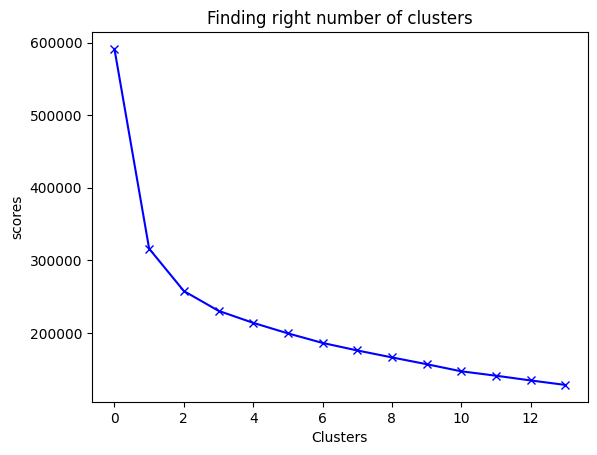

In [77]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [78]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [79]:
# concatenating cluster labels to sales dataframe to show which cluster correspond to which data point
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,0
1,34,81.35,5,2765.90,5,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,0
2,41,94.74,2,3884.34,7,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0
3,45,83.26,6,3746.70,8,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0
4,49,100.00,14,5205.27,10,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0


In [80]:
# combine cluster centers with sales_df columns
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])

In [81]:
# applying inverse scale to get meaningful values
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15
1,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,6.869505e-16,-1.110223e-15,1.000000e+00
2,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,7.424616e-16,1.000000e+00,-3.885781e-16


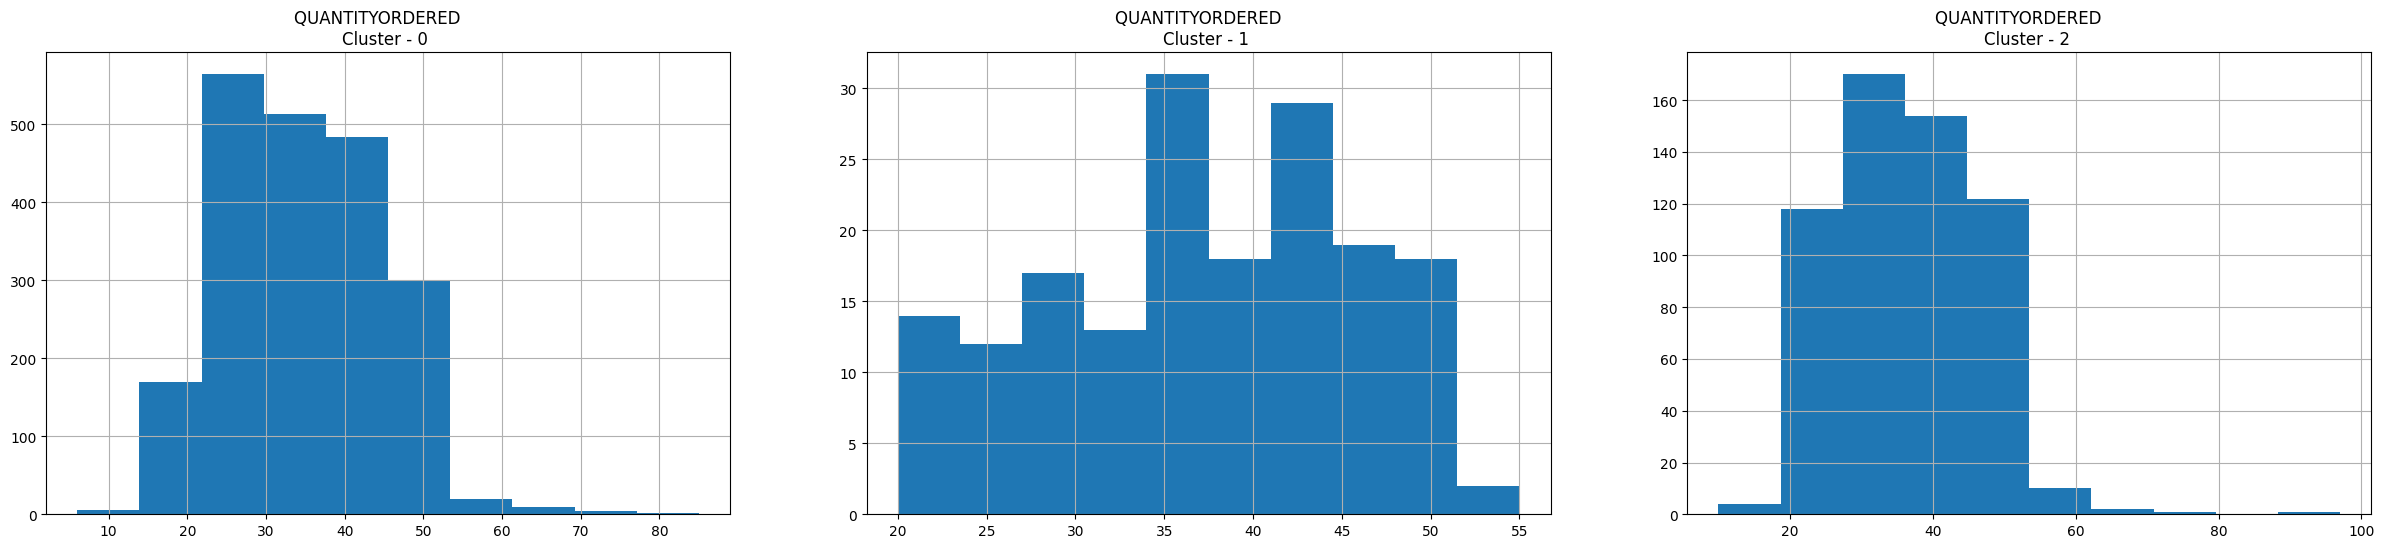

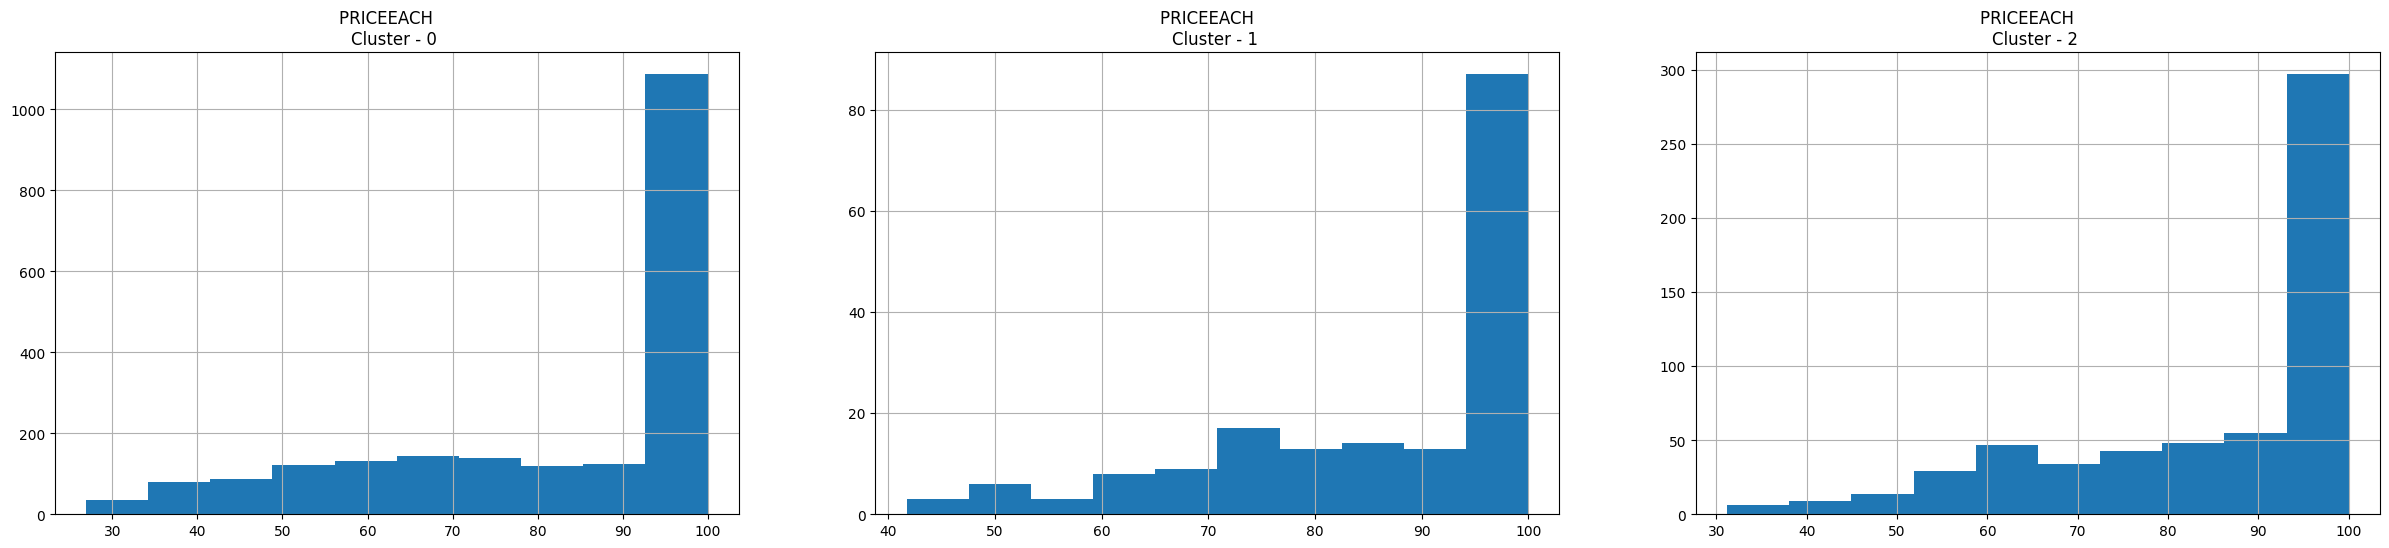

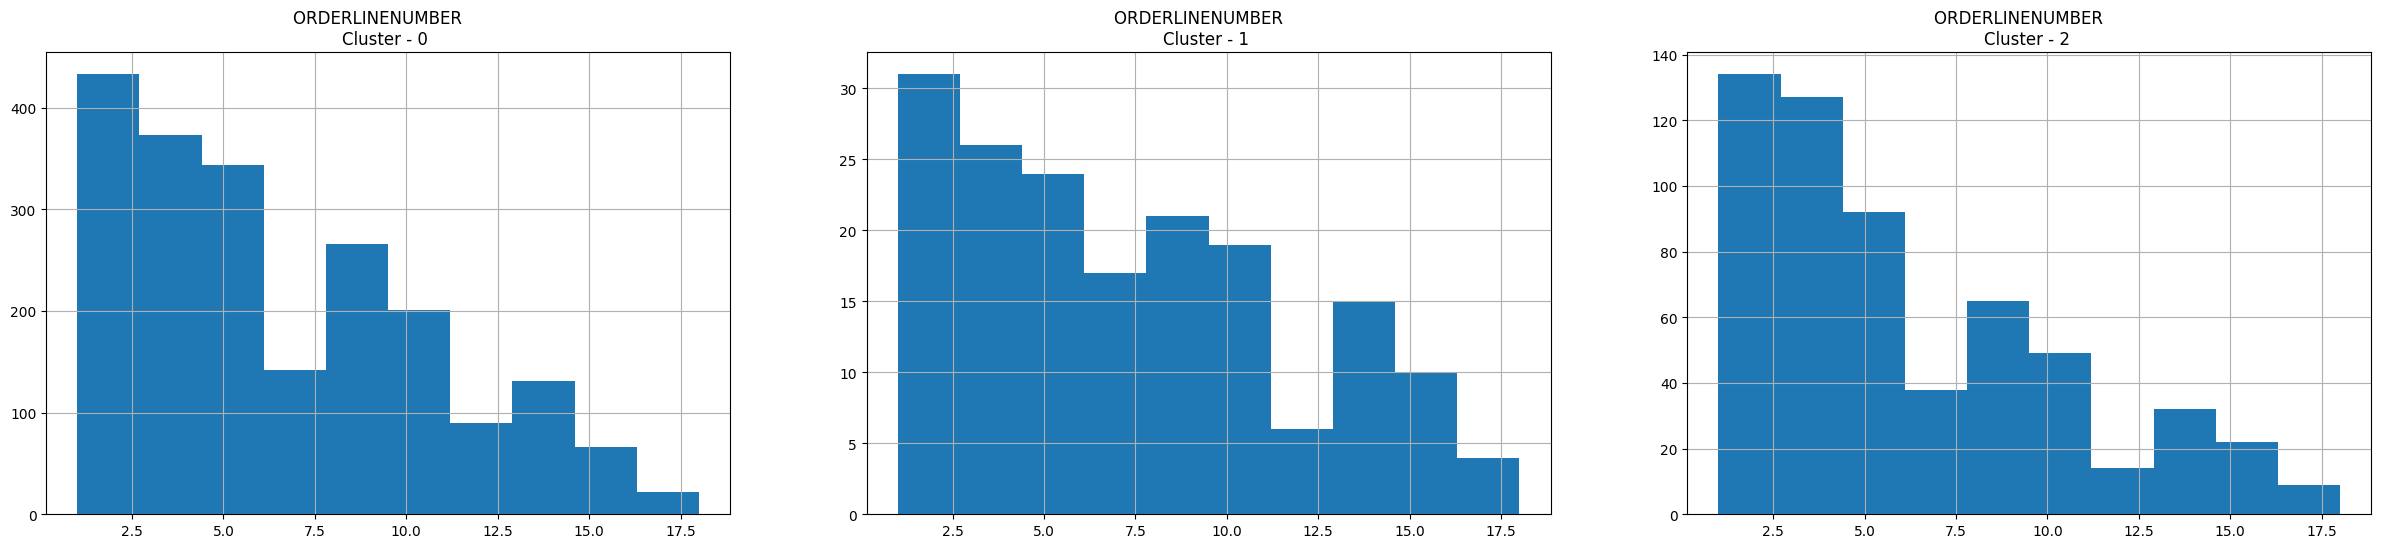

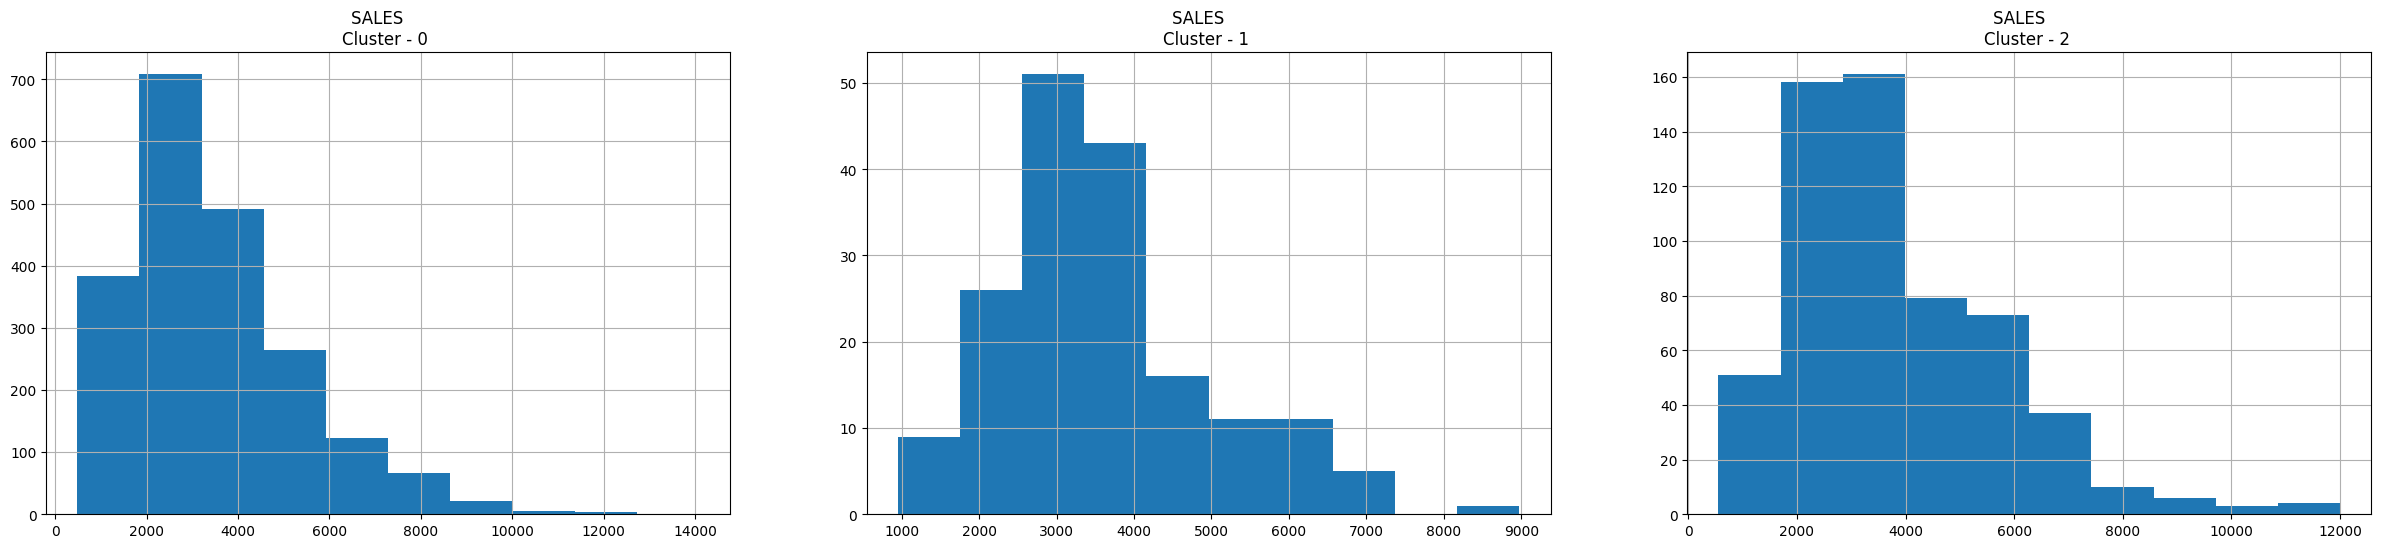

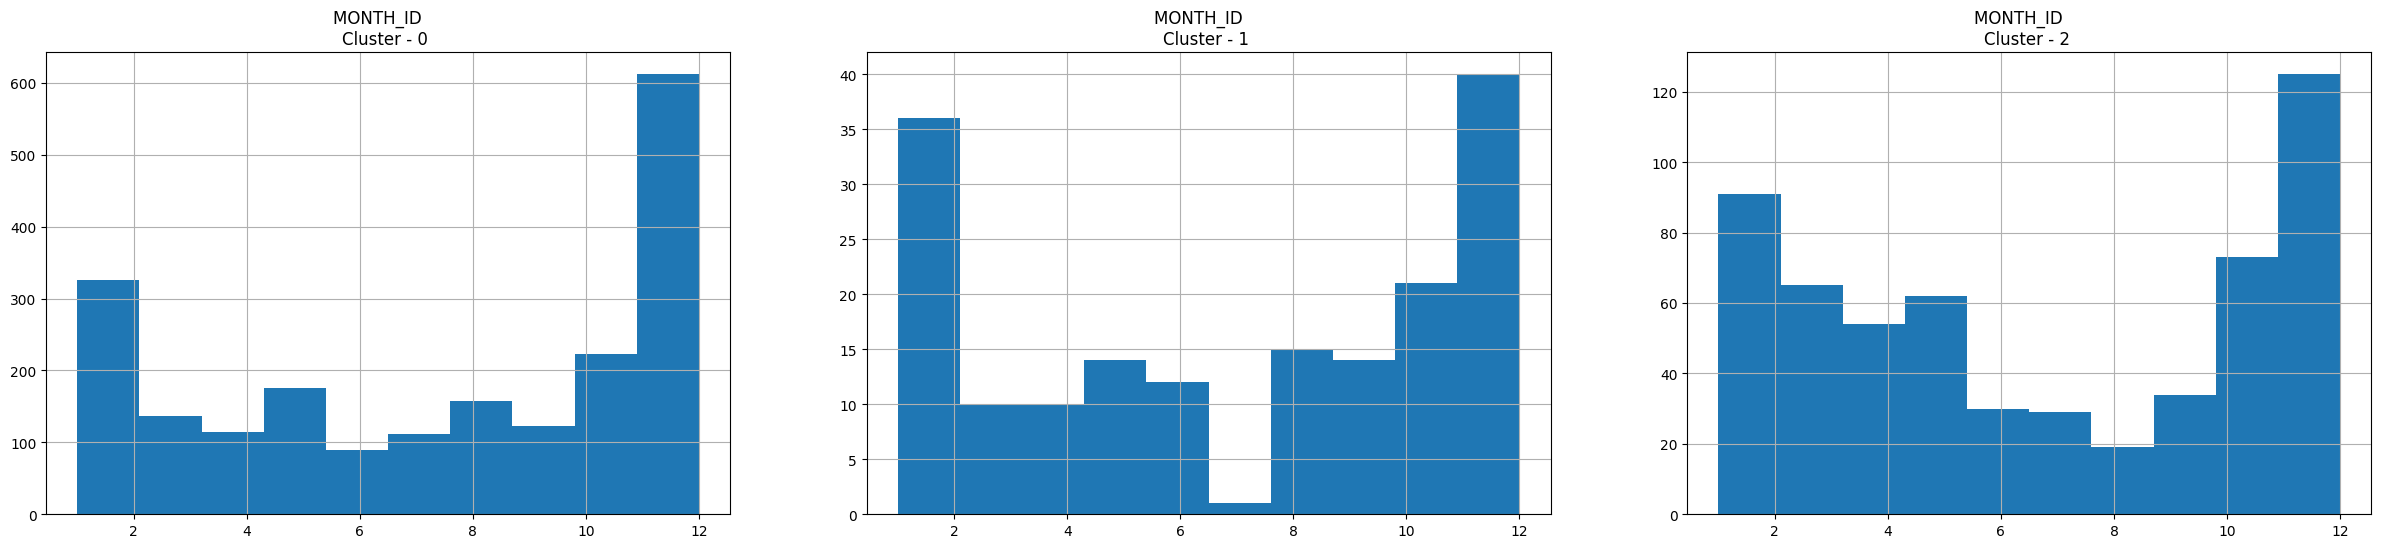

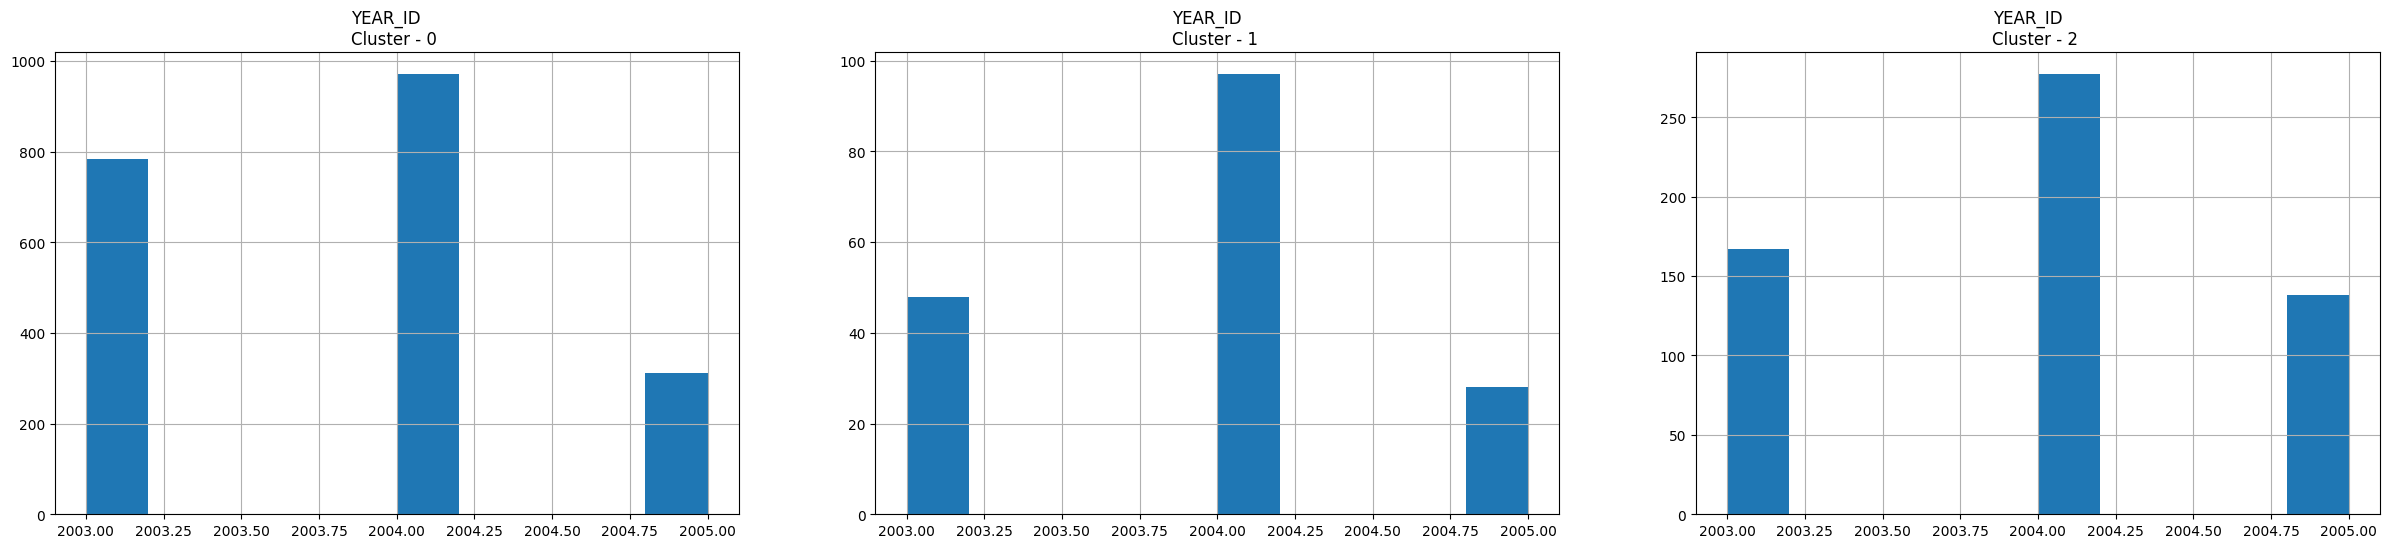

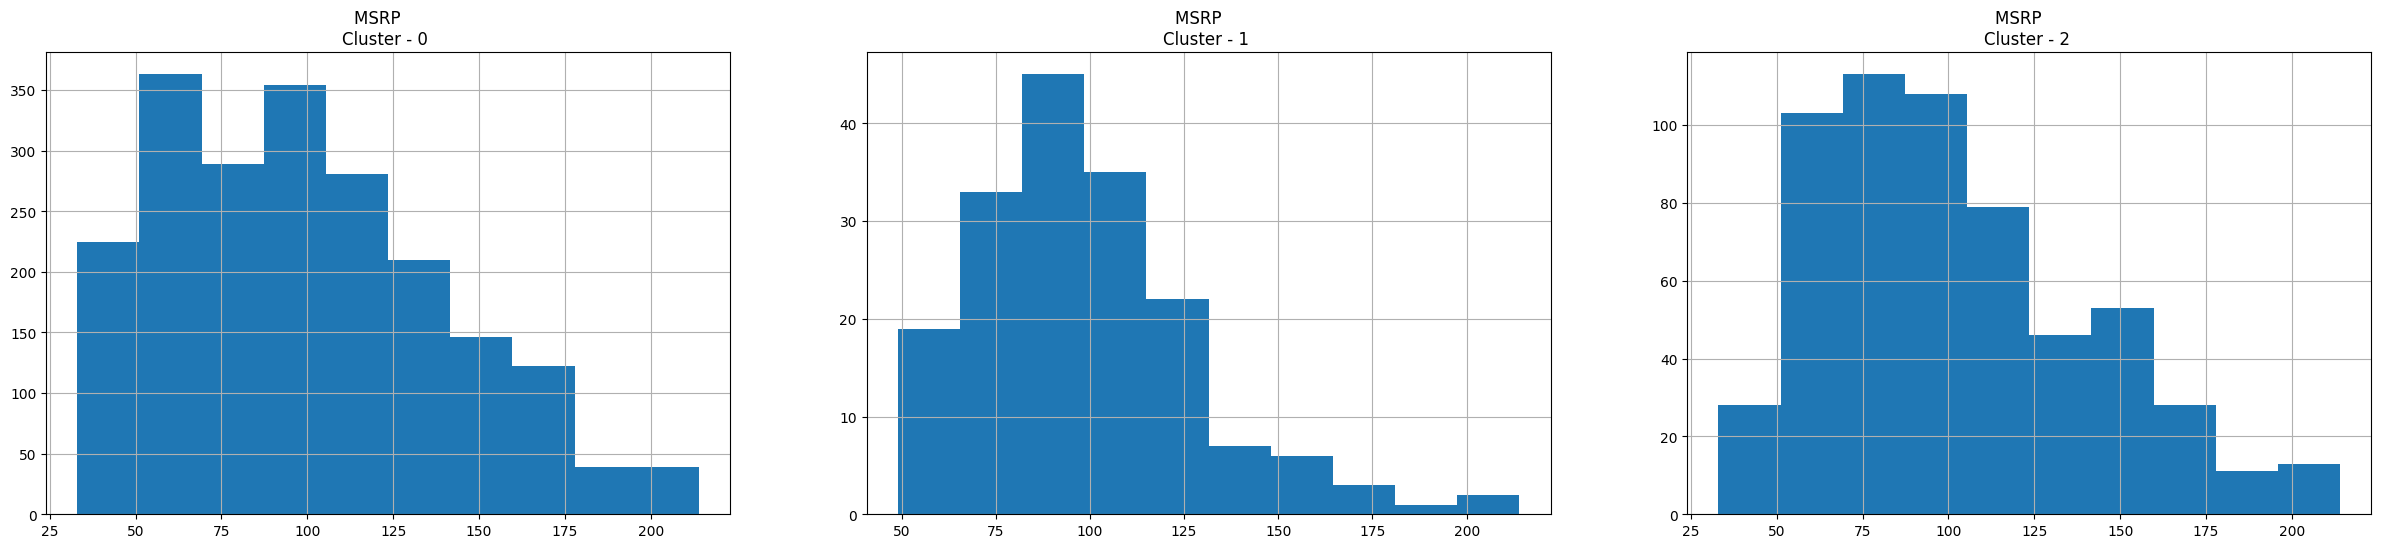

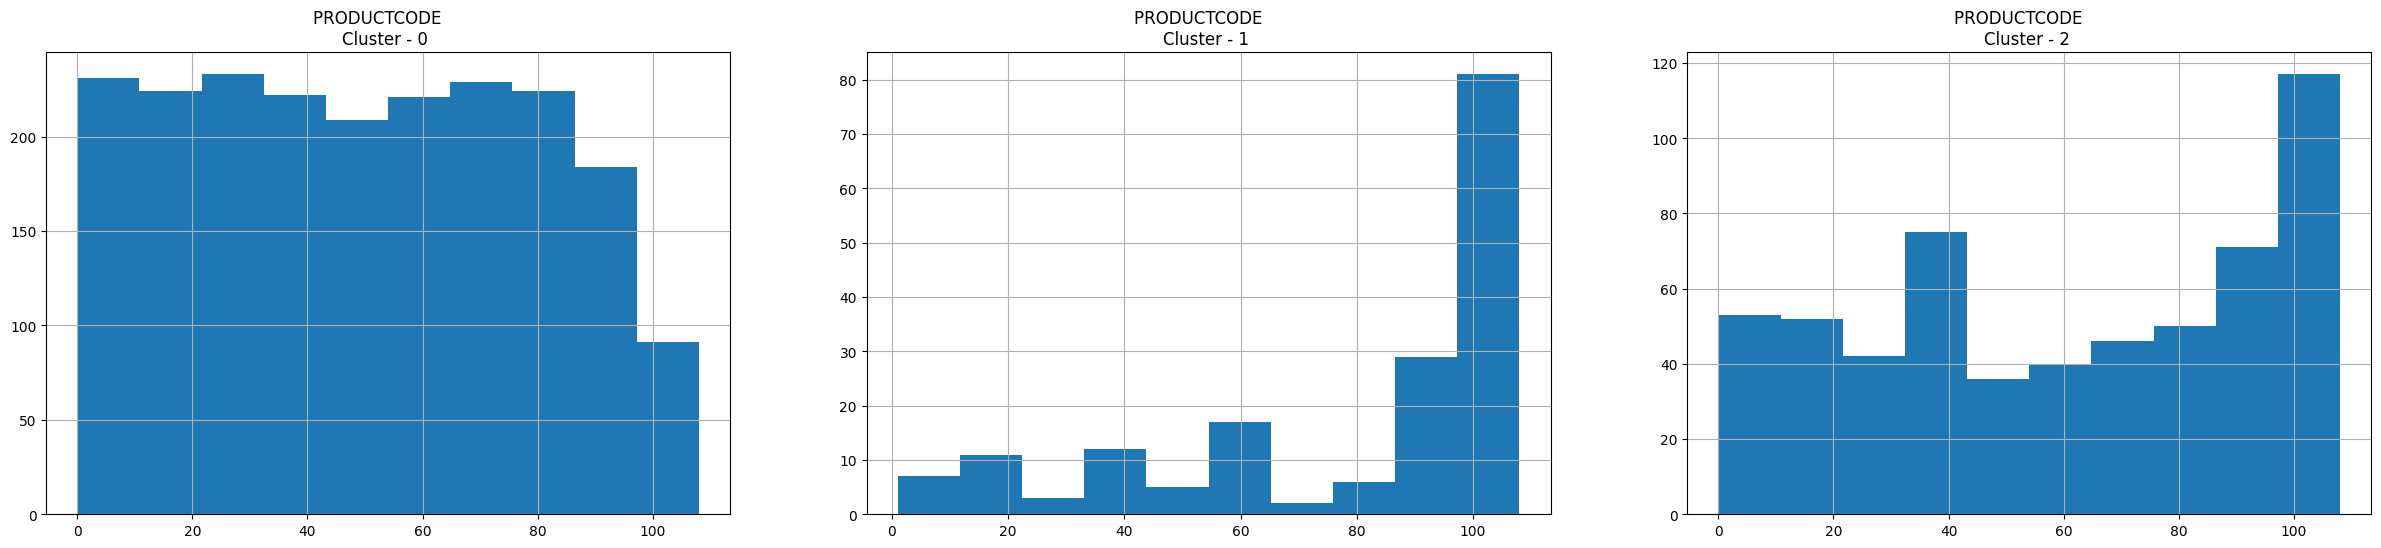

In [76]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()
# insights provided based on the cluster centers might vary slightly with each run of the model
# cluster 0 - this group represents customers who buy items in high quantity(47), they usually buy items with high prices(99), they bring-in more sales than other clusters (8293), they usually buy products corresponding to product code 26, they buy products with high mrsp(158).
# cluster 1 - this group represents customers who buy items in average quantity(30) they tend to buy high price items(69), they bring-in lowest sales(2062), they are the highest buyers of products corresponding to product code 62, Also they prefer to buy products with average MSRP(77) .
# cluster 2 - this group represents customers who buy items in small quantity(37), they tend to buy high price items(95), they bring-in average sales(4398), they are the highest buyers of products corresponding to product code 48, they then to buy products with low MSRP(116).

In [82]:
# reduce the original data to 3 dimension using PCA to visualize the clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486325,-1.214812,1.004084
1,-0.784697,-1.034284,1.414709
2,1.431423,0.125910,0.258993
3,1.288429,-0.222592,-0.584520
4,1.976028,-0.141746,-1.045044


In [83]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486325,-1.214812,1.004084,0
1,-0.784697,-1.034284,1.414709,0
2,1.431423,0.125910,0.258993,0
3,1.288429,-0.222592,-0.584520,0
4,1.976028,-0.141746,-1.045044,0


In [84]:
# visualize clusters using 3D-scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.show()